In [43]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.pyplot
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


#### Manipulation of dataframes with NIL information
The scope of this notebook is to manipulate data found on https://dati.comune.milano.it/ with geograpphical coordinates about NILs and Municipi of Milano. The dataset found have been manipulate and merged to obtain a final dataset containing aggregate information.

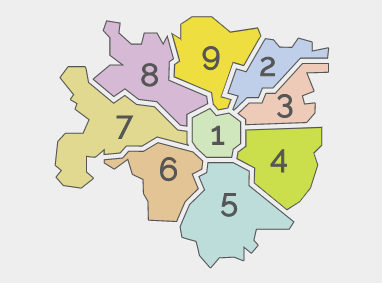

From this dataset we find information about Nils and geographical coordinates

In [44]:
df=pd.redf2=pd.read_csv('ds964_nil_wm_4326.csv',sep=';')

print(df.shape)
df.head()

(88, 11)


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Length,Shape_Area,OBJECTID,LONG_X_4326_CENTROID,LAT_Y_4326_CENTROID,Location
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,9.137260,45.438460,"(45.43846008524454, 9.137259756389806)"
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,9.101675,45.492822,"(45.49282208206156, 9.101674754135612)"
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,9.153947,45.484490,"(45.48449040970885, 9.15394716028658)"
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,9.156731,45.517433,"(45.51743260578181, 9.156730615341903)"
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,9.184235,45.523514,"(45.52351366911545, 9.184235146223243)"


In [45]:
#let's clean and keep only the data we need
df=df.drop(columns=df.columns[2:8])
df=df.drop(columns=df.columns[-1])
print(df.shape)
df.head()

(88, 4)


,ID_NIL,NIL,LONG_X_4326_CENTROID,LAT_Y_4326_CENTROID
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,9.137260,45.438460
1,64,TRENNO,9.101675,45.492822
2,67,PORTELLO,9.153947,45.484490
3,81,BOVISASCA,9.156731,45.517433
4,84,PARCO NORD,9.184235,45.523514


In [46]:
df.rename(columns={df.columns[2]: 'NIL_Long', df.columns[3]: 'NIL_Lat'},inplace=True)
print(df.shape)
df.head()

(88, 4)


,ID_NIL,NIL,NIL_Long,NIL_Lat
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,9.137260,45.438460
1,64,TRENNO,9.101675,45.492822
2,67,PORTELLO,9.153947,45.484490
3,81,BOVISASCA,9.156731,45.517433
4,84,PARCO NORD,9.184235,45.523514


In [47]:
df.sort_values(by='ID_NIL',inplace=True)
df.set_index('ID_NIL',inplace=True)

print(df.shape)
df.head()

(88, 3)


,NIL,NIL_Long,NIL_Lat
ID_NIL,,,
1,DUOMO,9.186948,45.463707
2,BRERA,9.188157,45.474252
3,GIARDINI P.TA VENEZIA,9.200231,45.474564
4,GUASTALLA,9.201891,45.463219
5,PORTA VIGENTINA - PORTA LODOVICA,9.192446,45.450950


From this dataset we find information about Nils and total Area(mq)

In [48]:
df2=pd.read_csv('Comune-di-Milano---Nuclei-dIdentita-Locale-quartieri.csv',sep=';',encoding='latin-1')
print(df2.shape)
df2.head()

(88, 5)


,ID del Nucleo Identità Locale,Nome del Nucleo Identità Locale,Area HA,Area MQ,Unnamed: 4
0,1,DUOMO,234.1704,"2,341,704.0730",NaN
1,2,BRERA,163.7395,"1,637,395.2332",NaN
2,3,GIARDINI PORTA VENEZIA,24.9647,"249,646.8331",NaN
3,4,GUASTALLA,154.8021,"1,548,020.7417",NaN
4,5,VIGENTINA,113.5239,"1,135,239.3183",NaN


In [49]:
df2.rename(columns={df2.columns[0]: 'ID_NIL',df2.columns[1]: 'NIL',df2.columns[3]: 'NIL_Area_mq'},inplace=True)
df2.sort_values(by='ID_NIL',inplace=True)
df2.set_index('ID_NIL',inplace=True)

print(df2.shape)
df2.head()

(88, 4)


,NIL,Area HA,NIL_Area_mq,Unnamed: 4
ID_NIL,,,,
1,DUOMO,234.1704,"2,341,704.0730",NaN
2,BRERA,163.7395,"1,637,395.2332",NaN
3,GIARDINI PORTA VENEZIA,24.9647,"249,646.8331",NaN
4,GUASTALLA,154.8021,"1,548,020.7417",NaN
5,VIGENTINA,113.5239,"1,135,239.3183",NaN


In [50]:
df2.drop(columns=df2.columns[[1]+[-1]],inplace=True)

print(df2.shape)
df2.head()

(88, 2)


,NIL,NIL_Area_mq
ID_NIL,,
1,DUOMO,"2,341,704.0730"
2,BRERA,"1,637,395.2332"
3,GIARDINI PORTA VENEZIA,"249,646.8331"
4,GUASTALLA,"1,548,020.7417"
5,VIGENTINA,"1,135,239.3183"


In [51]:
print(type(df2['NIL_Area_mq'][1]))
df2['NIL_Area_mq'].replace({',': ''},regex=True,inplace=True)
df2['NIL_Area_mq']=df2['NIL_Area_mq'].astype(float)
print(type(df2['NIL_Area_mq'][1]))

<class 'str'>
<class 'numpy.float64'>


In [52]:
df_NIL=df.merge(df2,how='inner',on='NIL',left_index=True,right_index=True)
print(df_NIL.shape)
df_NIL

(88, 4)


,NIL,NIL_Long,NIL_Lat,NIL_Area_mq
ID_NIL,,,,
1,DUOMO,9.186948,45.463707,2.341704e+06
2,BRERA,9.188157,45.474252,1.637395e+06
3,GIARDINI P.TA VENEZIA,9.200231,45.474564,2.496468e+05
4,GUASTALLA,9.201891,45.463219,1.548021e+06
5,PORTA VIGENTINA - PORTA LODOVICA,9.192446,45.450950,1.135239e+06
...,...,...,...,...
84,PARCO NORD,9.184235,45.523514,1.533639e+06
85,PARCO DELLE ABBAZIE,9.205639,45.411618,1.372200e+07
86,PARCO DEI NAVIGLI,9.141989,45.423321,3.617836e+06


In [53]:
print(df)
print(df2)
print(df_NIL)

                                     NIL  NIL_Long    NIL_Lat
ID_NIL                                                       
1                                  DUOMO  9.186948  45.463707
2                                  BRERA  9.188157  45.474252
3                  GIARDINI P.TA VENEZIA  9.200231  45.474564
4                              GUASTALLA  9.201891  45.463219
5       PORTA VIGENTINA - PORTA LODOVICA  9.192446  45.450950
...                                  ...       ...        ...
84                            PARCO NORD  9.184235  45.523514
85                   PARCO DELLE ABBAZIE  9.205639  45.411618
86                     PARCO DEI NAVIGLI  9.141989  45.423321
87                               ASSIANO  9.061547  45.449368
88                 PARCO BOSCO IN CITTA'  9.085757  45.484674

[88 rows x 3 columns]
                           NIL   NIL_Area_mq
ID_NIL                                      
1                        DUOMO  2.341704e+06
2                        BRERA  1.63

From this dataset we find information about Nils and Municipi, so we can assign each NIL to its Municipio.

In [54]:
df3=pd.read_csv('ds634_civici_coordinategeografiche_20210301_final.csv',sep=';')
print(df3.shape)
df3.head()

(64537, 38)


,CODICE_VIA,NUMERO,LETTERA,BARRA,BARRA2,NUMEROCOMPLETO,MUNICIPIO,RESIDENZIALE,STATOCIVICO,DATA_APPLICAZIONE,...,DESCRITTIVO,ANNCSU,OPENSTREETMAP,PROGANNCSU,CAP,ID_NIL,NIL,LONG_WGS84,LAT_WGS84,Location
0,1,21,NaN,,N08,21N08,1,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,20121.0,1.0,DUOMO,9.189762,45.464840,"(45.464839928425675, 9.189761993000747)"
1,1,23,NaN,NaN,N01,23N01,1,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,20121.0,1.0,DUOMO,9.190155,45.464843,"(45.4648432886, 9.19015496666)"
2,1,31,NaN,NaN,N04,31N04,1,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,20122.0,1.0,DUOMO,9.192733,45.464813,"(45.464812608650846, 9.192732850231893)"
3,1,31,NaN,NaN,NaN,31,1,1,Applicato,20041231.0,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,20122.0,1.0,DUOMO,9.192663,45.464811,"(45.46481140753645, 9.192663358957514)"
4,1,31,NaN,NaN,N03,31N03,1,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,20122.0,1.0,DUOMO,9.192602,45.464811,"(45.46481139569894, 9.192601816696717)"


In [55]:
df3=df3[['MUNICIPIO','NIL']]
df3.rename(columns={df3.columns[0]: 'MUN'},inplace=True)
print(df3.shape)
df3.head()

(64537, 2)


,MUN,NIL
0,1,DUOMO
1,1,DUOMO
2,1,DUOMO
3,1,DUOMO
4,1,DUOMO


In [56]:
df3.drop_duplicates(subset=['NIL'],inplace=True)
df3.reset_index(inplace=True,drop=True)

print(df3.duplicated().sum())
print(df3.shape)
print(df3.duplicated().sum())
print(df3.shape)
df3.head()

0
(89, 2)
0
(89, 2)


,MUN,NIL
0,1,DUOMO
1,1,BRERA
2,1,GUASTALLA
3,1,GIARDINI P.TA VENEZIA
4,1,PORTA VIGENTINA - PORTA LODOVICA


In [57]:
print(df3.isnull().sum())
df3.dropna(inplace=True)
print(df3.isnull().sum())

MUN    0
NIL    1
dtype: int64
MUN    0
NIL    0
dtype: int64


In [58]:
df3['NIL'].values==df_NIL['NIL'].values

array([ True,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [59]:
print(df_NIL)
print(df3)

                                     NIL  NIL_Long    NIL_Lat   NIL_Area_mq
ID_NIL                                                                     
1                                  DUOMO  9.186948  45.463707  2.341704e+06
2                                  BRERA  9.188157  45.474252  1.637395e+06
3                  GIARDINI P.TA VENEZIA  9.200231  45.474564  2.496468e+05
4                              GUASTALLA  9.201891  45.463219  1.548021e+06
5       PORTA VIGENTINA - PORTA LODOVICA  9.192446  45.450950  1.135239e+06
...                                  ...       ...        ...           ...
84                            PARCO NORD  9.184235  45.523514  1.533639e+06
85                   PARCO DELLE ABBAZIE  9.205639  45.411618  1.372200e+07
86                     PARCO DEI NAVIGLI  9.141989  45.423321  3.617836e+06
87                               ASSIANO  9.061547  45.449368  5.844580e+06
88                 PARCO BOSCO IN CITTA'  9.085757  45.484674  7.837669e+06

[88 rows x 

In [60]:
df_NIL=df_NIL.merge(df3,how='inner',on='NIL',right_index=True)
print(df_NIL.shape)
df_NIL.head()

(88, 5)


,NIL,NIL_Long,NIL_Lat,NIL_Area_mq,MUN
ID_NIL,,,,,
1,DUOMO,9.186948,45.463707,2.341704e+06,1
2,BRERA,9.188157,45.474252,1.637395e+06,1
3,GIARDINI P.TA VENEZIA,9.200231,45.474564,2.496468e+05,1
4,GUASTALLA,9.201891,45.463219,1.548021e+06,1
5,PORTA VIGENTINA - PORTA LODOVICA,9.192446,45.450950,1.135239e+06,1


#### Plot to check if everything went rigth

In [61]:
address = 'Milano, Italy'

geolocator = Nominatim(user_agent="MI_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milano, Italy are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milano, Italy are 45.4668, 9.1905.


In [62]:
# create map of Milano using latitude and longitude values
map_milano = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(1,9)
ys = [i + x + (i*x)**2 for i in range(9)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, municipio, nil,id_nil in zip(df_NIL['NIL_Lat'], df_NIL['NIL_Long'], df_NIL['MUN'], df_NIL['NIL'],df_NIL.index):
    label = 'NIL id: {}, NIL name:{}, Municipio {}'.format(id_nil,nil, municipio)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[municipio-1],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milano)  
    
map_milano

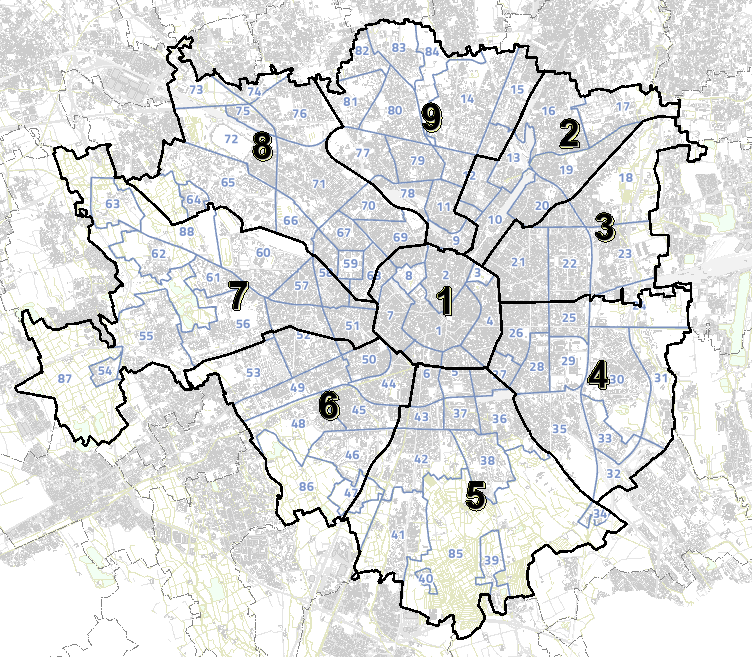

In [63]:
df_NIL.to_csv('NIL_data') #index True by default